# VAE - Hard EM 

In [1]:
import os

os.environ["TPU_CHIPS_PER_HOST_BOUNDS"] = "1,1,1"
os.environ["TPU_HOST_BOUNDS"] = "1,1,1"
# Different per process:
os.environ["TPU_VISIBLE_DEVICES"] = "2"

In [17]:
import hlax
import json
import tomli
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob

In [10]:
%config InlineBackend.figure_format = "retina"

In [22]:
def build_iwmll_df(output_test):
    df_all = []
    for key in output_test:
        df_mll = pd.DataFrame.from_dict(output_test[key])
        df_mll.columns = ["hard-em", "vae"]
        df_mll = pd.DataFrame.from_dict(output_test[key])
        df_mll.columns = [f"hard-em", "vae"]
        df_mll = df_mll.melt(value_name="mll")
        df_mll["episode"] = int(key.lstrip("e"))
        df_all.append(df_mll)
    df_all = pd.concat(df_all, axis=0)
    return df_all

In [3]:
experiments = sorted(glob("../experiments/outputs/*.pkl"))
print(*experiments, sep="\n")

../experiments/outputs/experiment-20221017-104945.pkl
../experiments/outputs/experiment-20221017-105509.pkl
../experiments/outputs/experiment-20221017-105847.pkl
../experiments/outputs/experiment-20221017-110349.pkl
../experiments/outputs/experiment-20221017-110900.pkl
../experiments/outputs/experiment-20221017-112423.pkl
../experiments/outputs/experiment-20221017-113056.pkl
../experiments/outputs/experiment-20221017-151956.pkl
../experiments/outputs/experiment-20221017-153116.pkl


In [5]:
path_experiment = experiments[-1]
with open(path_experiment, "rb") as f:
    experiment = pickle.load(f)

In [36]:
path_config = os.path.join("..", experiment["metadata"]["path_config"])
with open(path_config, "rb") as f:
    config = tomli.load(f)

print(json.dumps(config, indent=2))

{
  "warmup": {
    "num_obs": 10000,
    "num_epochs": 1000,
    "batch_size": 200,
    "dim_latent": 50,
    "eval_epochs": [
      2,
      10,
      100,
      250,
      500,
      1000
    ],
    "learning_rate": 0.001,
    "vae": {
      "num_is_samples": 10
    },
    "hard_em": {
      "num_its_latent": 20,
      "num_its_params": 5
    }
  },
  "test": {
    "num_obs": 1000,
    "num_epochs": 1000,
    "learning_rate": 0.0001,
    "num_is_samples": 10
  }
}


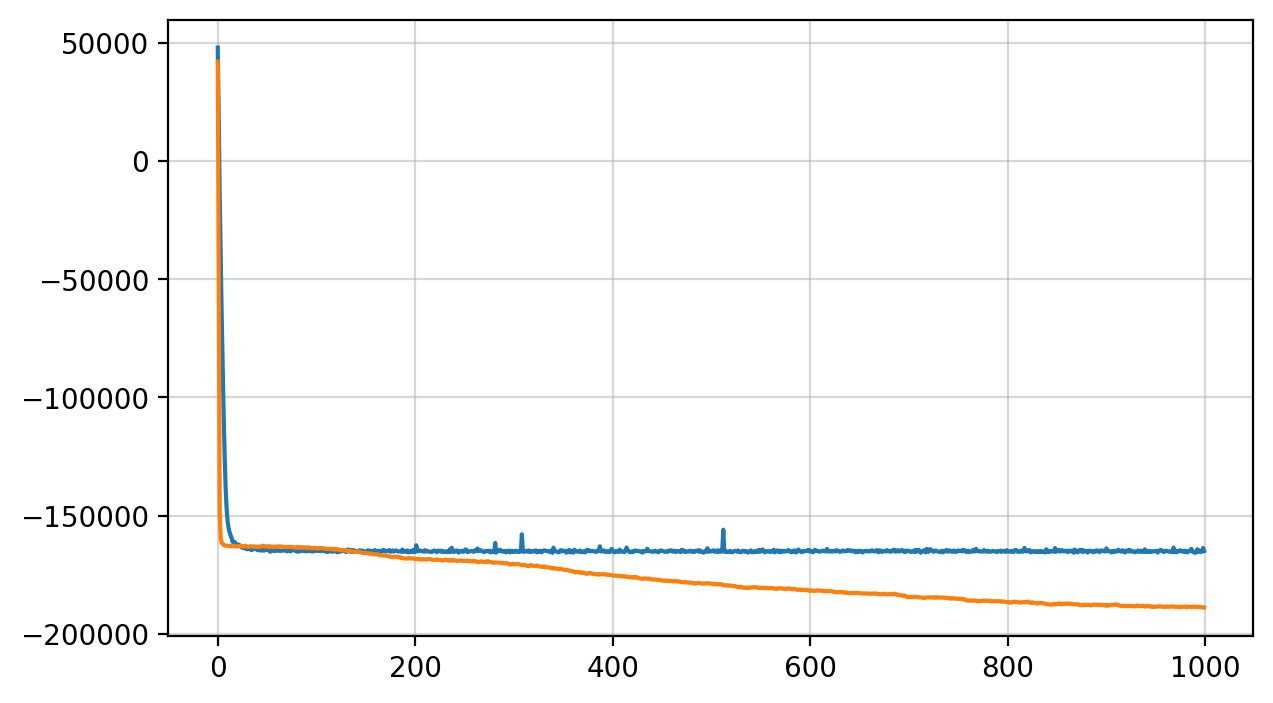

In [27]:
fig, ax = plt.subplots(figsize=(7, 4))
plt.plot(experiment["warmup"]["vae"]["hist_loss"], label="VAE")
plt.plot(experiment["warmup"]["hardem"]["hist_loss"], label="Hard-EM")
plt.grid(alpha=0.5)

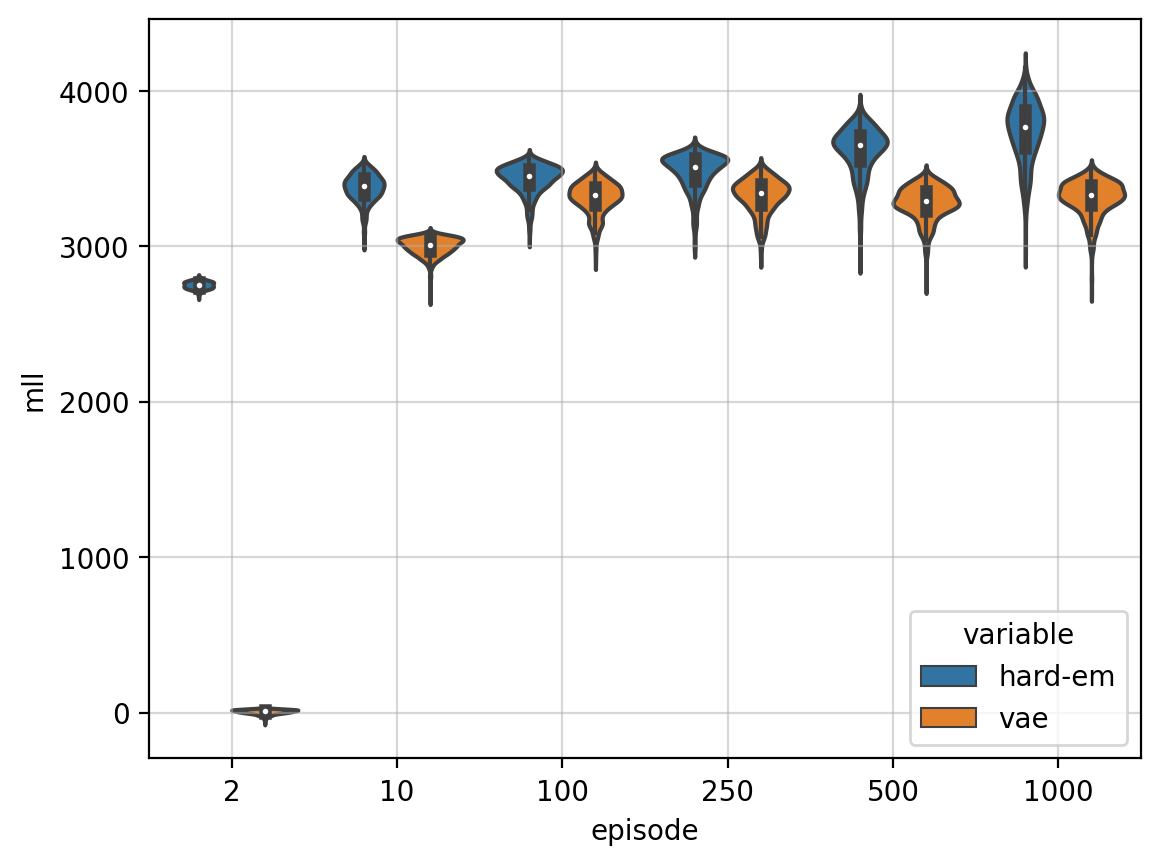

In [23]:
df_all = build_iwmll_df(experiment["test"])
sns.violinplot(x="episode", y="mll", hue="variable", data=df_all)
plt.grid(alpha=0.5)